In [1]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

from matplotlib import cm
import matplotlib.ticker as ticker
from matplotlib.ticker import LinearLocator


#get the paths to be able to import functions and csv files
%cd /Users/ronja/Documents/GitHub/neural-fields-local

import sys
sys.path.append('/Users/ronja/Documents/GitHub/neural-fields-local/py')
csv_path = '/Users/ronja/Documents/GitHub/neural-fields-local/csv'
sys.path.append(csv_path)

# This will reload all imports as soon as the code changes
%load_ext autoreload
%autoreload 2 

/Users/ronja/Documents/GitHub/neural-fields-local


### Packages

As of right now: it's not fully sorted what to be found in py or py.twoD-files. 

In [2]:
#Import the 2-dimensional model
import twoD.continuum2d as continuum2d
c2d = continuum2d.continuum2d()

#import function to set parameters with the option to change specfic ones
from twoD.params2d import setParams

#import from twoD-folder the functions to determine the fixed points, their stability and whether they undergo a violation 
from twoD.analysis2d import computeFPs, checkFixPtsStability, a_jkValues, violationType
from twoD.turings2d import checkStability 

#import video-function - NOTE: This funciton automatically changes directory into
#/Users/ronja/Documents/GitHub/neural-fields-local/vids
#to be able to save the videos
from twoD.funcs2d import mkAnimation

#functions to set the kernel in relation to the sheet
from twoD.funcs2d import circleLimit_Gaussian, withinCircle, covered_space




2d Model initialised.


In [3]:
#common visualisation parameters
tfs = 25
fs = 20
lw = 3
space_labels = [-12.5, -6.25, 0, 6.25, 12.5]

# Simulate Activity

Notes:

    - Spatial discretization is key! Too coarse leads to patterns that form due to a lack of continuous connectivity ("discretization effect").

    - Running the simulation will save you snapshots/timeframes of the activity over the 2-dimensional space. You can determine how many images with the $\texttt{param}$ $\texttt{pic\_nmb}$.
    
    - A method for videos is implemented and can be found in py.twoD.funcs2d: mkAnimation


In [4]:
ee = 0.4
ii = -0.1
params={'I_e': ee, 'I_i': ii, 'end_t': 10*1000, 'sigma_e': 1, 'sigma_i': 3, 'b': 0.0,
        'pic_nmb': 10, 'xlength': 25, 'ylength': 25, 'n': int(2**7), 'm': int(2**7), 
        'seed': 0, 'seed_amp': 0.2}

params = setParams(params)
fps = computeFPs(params)
stab = checkFixPtsStability(fps, params)
print('fixed points %s ' %str(fps))
print('with (mass) stability %s'  %str(stab))

l=201
k = np.linspace(0,2,l)
kk = []

#collect wavenumbers $k$ and $\omega$ to vary the spatial perturbation 
#into the form $k**2+\omega**2$

for idx1 in range(l):
    for idx2 in range(idx1, l):
        kk.append(k[idx1]**2+k[idx2]**2)

kk.sort()
kk = np.array(kk)

#get matrix values to call funtion that determines the type of violaton
index = 0
a_ee, a_ei, a_ie, a_ii = a_jkValues(fps[index], params)

if params.b==0:
     #since without b (i.e. without adaps) the dynamical system consists of 
     #two differential equations, the determination of the violation is determined 
     #by determinant & trace
     violation, k0 = violationType(kk, a_ee, a_ei, a_ie, a_ii, params)
else: 
    #with b!=0, by the cubic polynomial
    violation = checkStability(kk, fps[0], params)

print('Fixed point %s, i.e. fp number %i undergoes the violation %s' 
      %(str(fps[index]), index, str(violation)))

fixed points [[0.15323606 0.47393995]
 [0.75863557 0.99945812]
 [0.99245613 0.99998853]] 
with (mass) stability [1, 0, 1]
Fixed point [0.15323606 0.47393995], i.e. fp number 0 undergoes the violation 1


/Users/ronja/Documents/GitHub/neural-fields-local/py/twoD/kernels2d.py:33: RuntimeWarning: overflow encountered in exp
  return np.exp((-2.0) * (np.pi**2) * (sigma**2) * k )
/Users/ronja/Documents/GitHub/neural-fields-local/py/twoD/analysis2d.py:405: RuntimeWarning: invalid value encountered in subtract
  return (turing_A11(k, a_ee, params)*turing_A22(k, a_ii, params))-(turing_A12(k, a_ei, params)*turing_A21(k, a_ie, params))


In [5]:
#run activity without adaptation
ue, ui = c2d.run(params, itype='inte_adaptation', fp=fps[index])

adaps shape=(128, 128), e-shae=(128, 128), inh-shape=(128, 128)


In [6]:
#run activity with adaptation
params['b']=0.25
params['I_e'] = 0.1
params['I_i'] = -0.9

params = setParams(params)

#requires new fp-evaluation since the value slightly changes when adaps is considered
fps = computeFPs(params)

index = 0
a_ee, a_ei, a_ie, a_ii = a_jkValues(fps[index], params)

violation = checkStability(kk, fps[index], params)

print('Fixed point %s, i.e. fp number %i undergoes the violations %s' 
      %(str(fps[index]), index, str(violation)))

Fixed point [0.42489792 0.53066606], i.e. fp number 0 undergoes the violations (1, 1, 0)


In [7]:
ue_temporal, ui_temporal = c2d.run(params, itype='inte_adaptation', fp=fps[index])

adaps shape=(128, 128), e-shae=(128, 128), inh-shape=(128, 128)


In [8]:

#run activity with adaptation
params['b']=0.25
params['I_e'] = 0.4
params['I_i'] = -0.1

params = setParams(params)

#requires new fp-evaluation since the value slightly changes when adaps is considered
fps = computeFPs(params)

index = 0
a_ee, a_ei, a_ie, a_ii = a_jkValues(fps[index], params)

violation = checkStability(kk, fps[index], params)

print('Fixed point %s, i.e. fp number %i undergoes the violations %s' 
      %(str(fps[index]), index, str(violation)))

Fixed point [0.14777515 0.46335919], i.e. fp number 0 undergoes the violations (1, 1, 0)


In [9]:
ue_adaps, ui_adaps = c2d.run(params, itype='inte_adaptation', fp=fps[index])

adaps shape=(128, 128), e-shae=(128, 128), inh-shape=(128, 128)


In [23]:
np.array(ue_adaps).T.shape, np.mean(ue_adaps)

((128, 128, 11), 0.4616542006812701)

In [10]:
titles = [r'$timestep\ t_{%i}$' %i for i in np.linspace(0, params.pic_nmb, int(params.pic_nmb+1)).astype(int)]
types = [r'$2d\ u_e\ without\ a(x,t)$' + '\n' + 'spatial', 
         r'$2d\ u_e\ with\ a(x,t)$' + '\n' + 'temporal', 
         r'$2d\ u_e\ with\ a(x,t)$' + '\n' + 'spatiotemporal']

/var/folders/8l/w8cdnkkj38bg2pscx__1vxth0000gn/T/ipykernel_2051/3113031930.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=space_labels, fontsize=fs)
/var/folders/8l/w8cdnkkj38bg2pscx__1vxth0000gn/T/ipykernel_2051/3113031930.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels=space_labels, fontsize=fs)


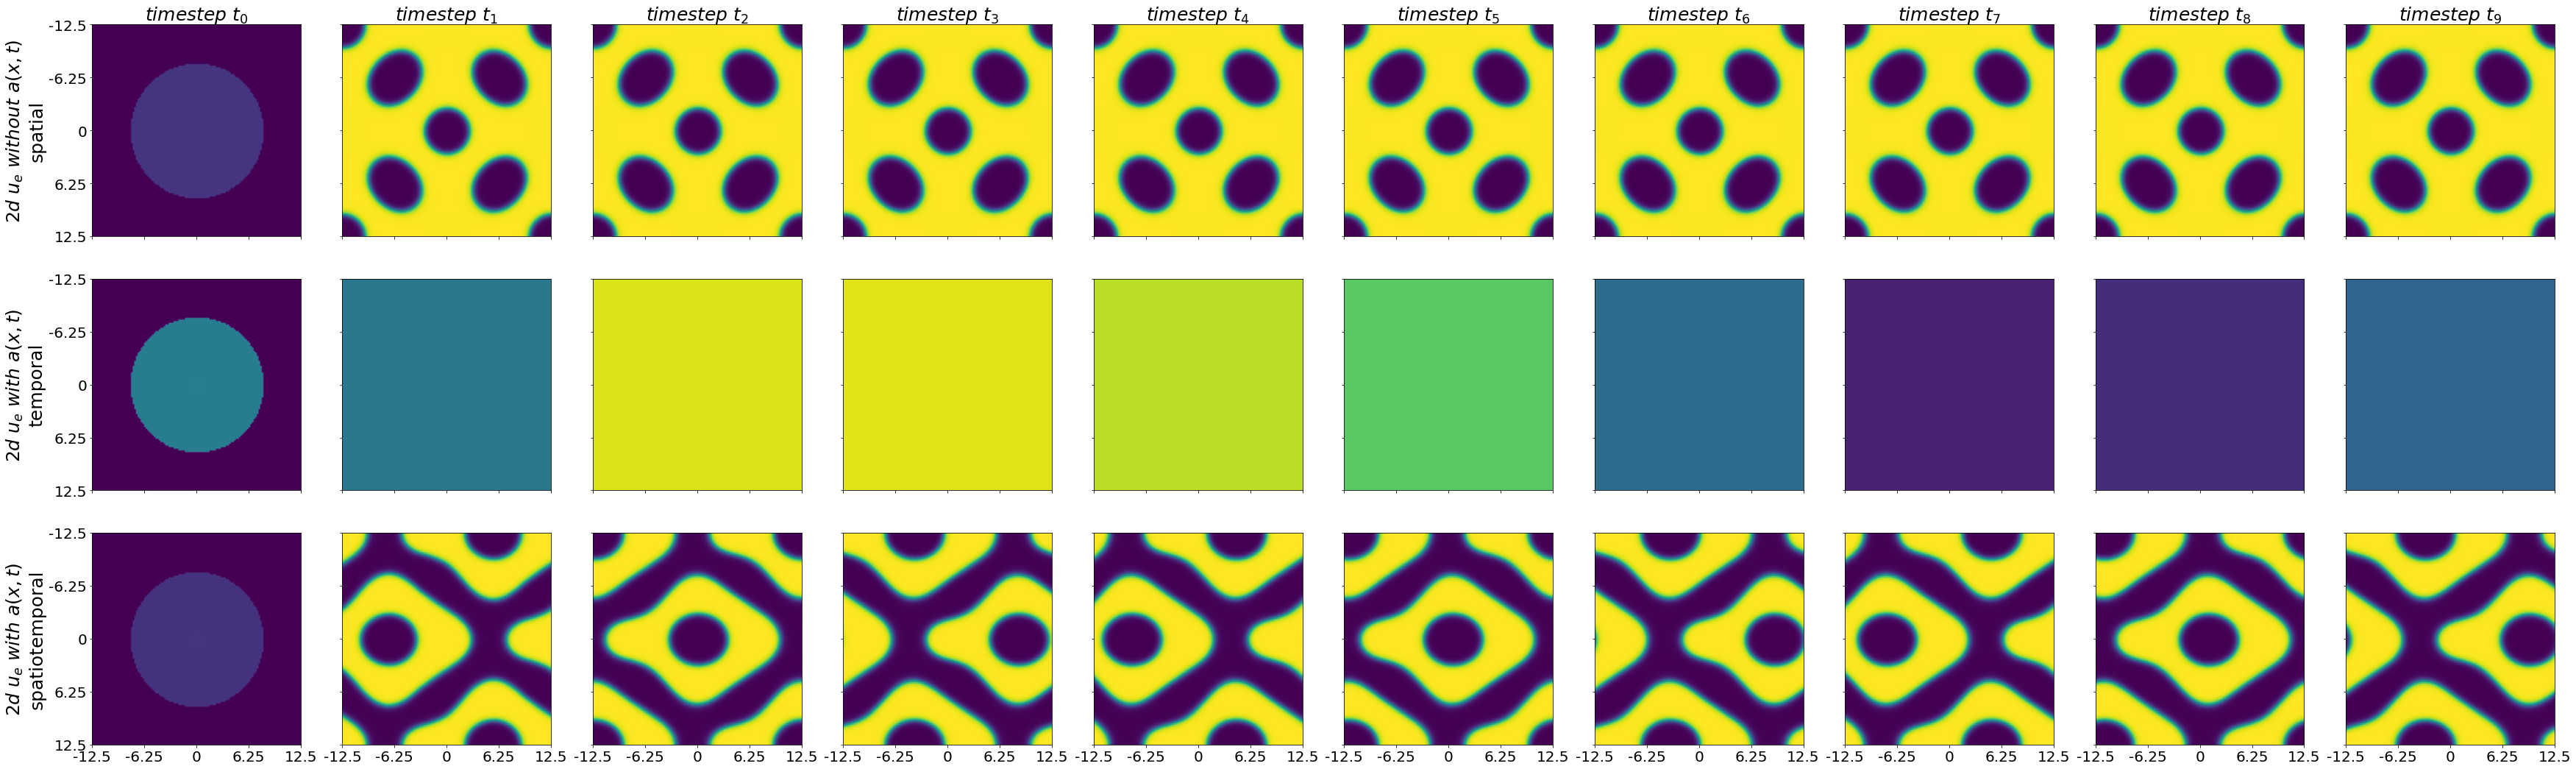

In [11]:
#titles=[r'$2d\ u_e\ without\ a(x,t)$', r'$2d\ u_e\ with\ a(x,t)$']
fig, axes = plt.subplots(3, params.pic_nmb, figsize=(6*params.pic_nmb, 18), 
                         sharex=True, sharey=True)

for i, ax in enumerate(axes[0,:]):
    ax.imshow(ue[i].T, vmin=0, vmax=1, aspect='auto')
    ax.set_title(label=titles[i], fontsize=tfs)
    

for i, ax in enumerate(axes[1,:]):
    ax.imshow(ue_temporal[i].T, vmin=0, vmax=1, aspect='auto')

for i, ax in enumerate(axes[2,:]):
    ax.imshow(ue_adaps[i].T, vmin=0, vmax=1, aspect='auto')

for i, ax in enumerate(axes[2,:]):
    ax.xaxis.set_major_locator(ticker.LinearLocator(len(space_labels)))
    ax.set_xticklabels(labels=space_labels, fontsize=fs)

for i, ax in enumerate(axes[:,0]):
    ax.set_ylabel(ylabel=types[i], fontsize=tfs)
    ax.yaxis.set_major_locator(ticker.LinearLocator(len(space_labels)))
    ax.set_yticklabels(labels=space_labels, fontsize=fs)
    

## Seed options

Above, the activity per population is initialised around the corresponding fixed-point value in the shape of the Gaussian kernel that is chosen as spatial connection kernel. It is also possible to initialise the activity 

    1. around the fixed point with a random number generater whereas one can plan a seed (any number > 0), to ensure the same initalisation with the same seed
    2. one can randomly jitter around the fixed point
    3. randomly at values close to 0.

In [12]:
#random number generator - parameters: 
#   params={'seed': 2}

#random jitter around fp: CALL RUN WITH fp=fp and before that, set
#   params={'seed': -1}

#random jitter close to 0:
#   params={'seed': -1} #call run without fixedpoint: c2d.run(params, itype)

# Spatial Kernel

The spatial kernel decides on the connectivity profile (i.e. type of decay in connectivity with distance). At default, we use the normalised Gaussian:

$
w(x)=\frac{1}{2\pi\sigma^2}\text{e}^{-\frac{r}{2\sigma^2}}
$

whereas $r$ is the Euclidean distance of a position $y=(y_1, y_2)\in\mathbb{R}^2$ to the point of origin ("zero") $x=(0, 0)$.

$
r=dist(x,y)=||x-y||^2=(x_1-y_1)^2+(x_2-y_2)^2=y_1^2+y_2^2
$

In [13]:
params['n'] = 512
params['m'] = 512
params=setParams(params)

x = params.x #np.roll(params_orig.x, round(params_orig.n/2-1))[::-1]
y = params.y #np.roll(params_orig.y, round(params_orig.m/2-1))[::-1]
ke = params.ke #np.roll(params_orig.ke, round(params_orig.n/2-1))[::-1]
ki = params.ki #np.roll(params_orig.ki, round(params_orig.n/2-1))[::-1]

combi_e = (params.w_ee*ke -params.w_ei*ki)*(1/params.dx)*(1/params.dy)
combi_i = (params.w_ie*ke-params.w_ii*ki)*(1/params.dx)*(1/params.dy)

## The kernels

Below, you can see the kernels visualised. In the first column, the kernels without weights and in combinations as given in input, in the second column, the combined kernels with the weights as they are feeding the activity as input, and in the third column, the top-down view respectively.

/var/folders/8l/w8cdnkkj38bg2pscx__1vxth0000gn/T/ipykernel_2051/729940471.py:44: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=space_labels, fontsize=fs)
/var/folders/8l/w8cdnkkj38bg2pscx__1vxth0000gn/T/ipykernel_2051/729940471.py:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels=space_labels, fontsize=fs)
/var/folders/8l/w8cdnkkj38bg2pscx__1vxth0000gn/T/ipykernel_2051/729940471.py:55: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_zticklabels(labels=single_kernel_values, fontsize=fs)
/var/folders/8l/w8cdnkkj38bg2pscx__1vxth0000gn/T/ipykernel_2051/729940471.py:60: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_zticklabels(labels=combi_kernel_values, fontsize=fs)
/var/folders/8l/w8cdnkkj38bg2pscx__1vxth0000gn/T/ipykernel_2051/729940471.py:65: UserWarning: FixedFormatter should only be used together wi

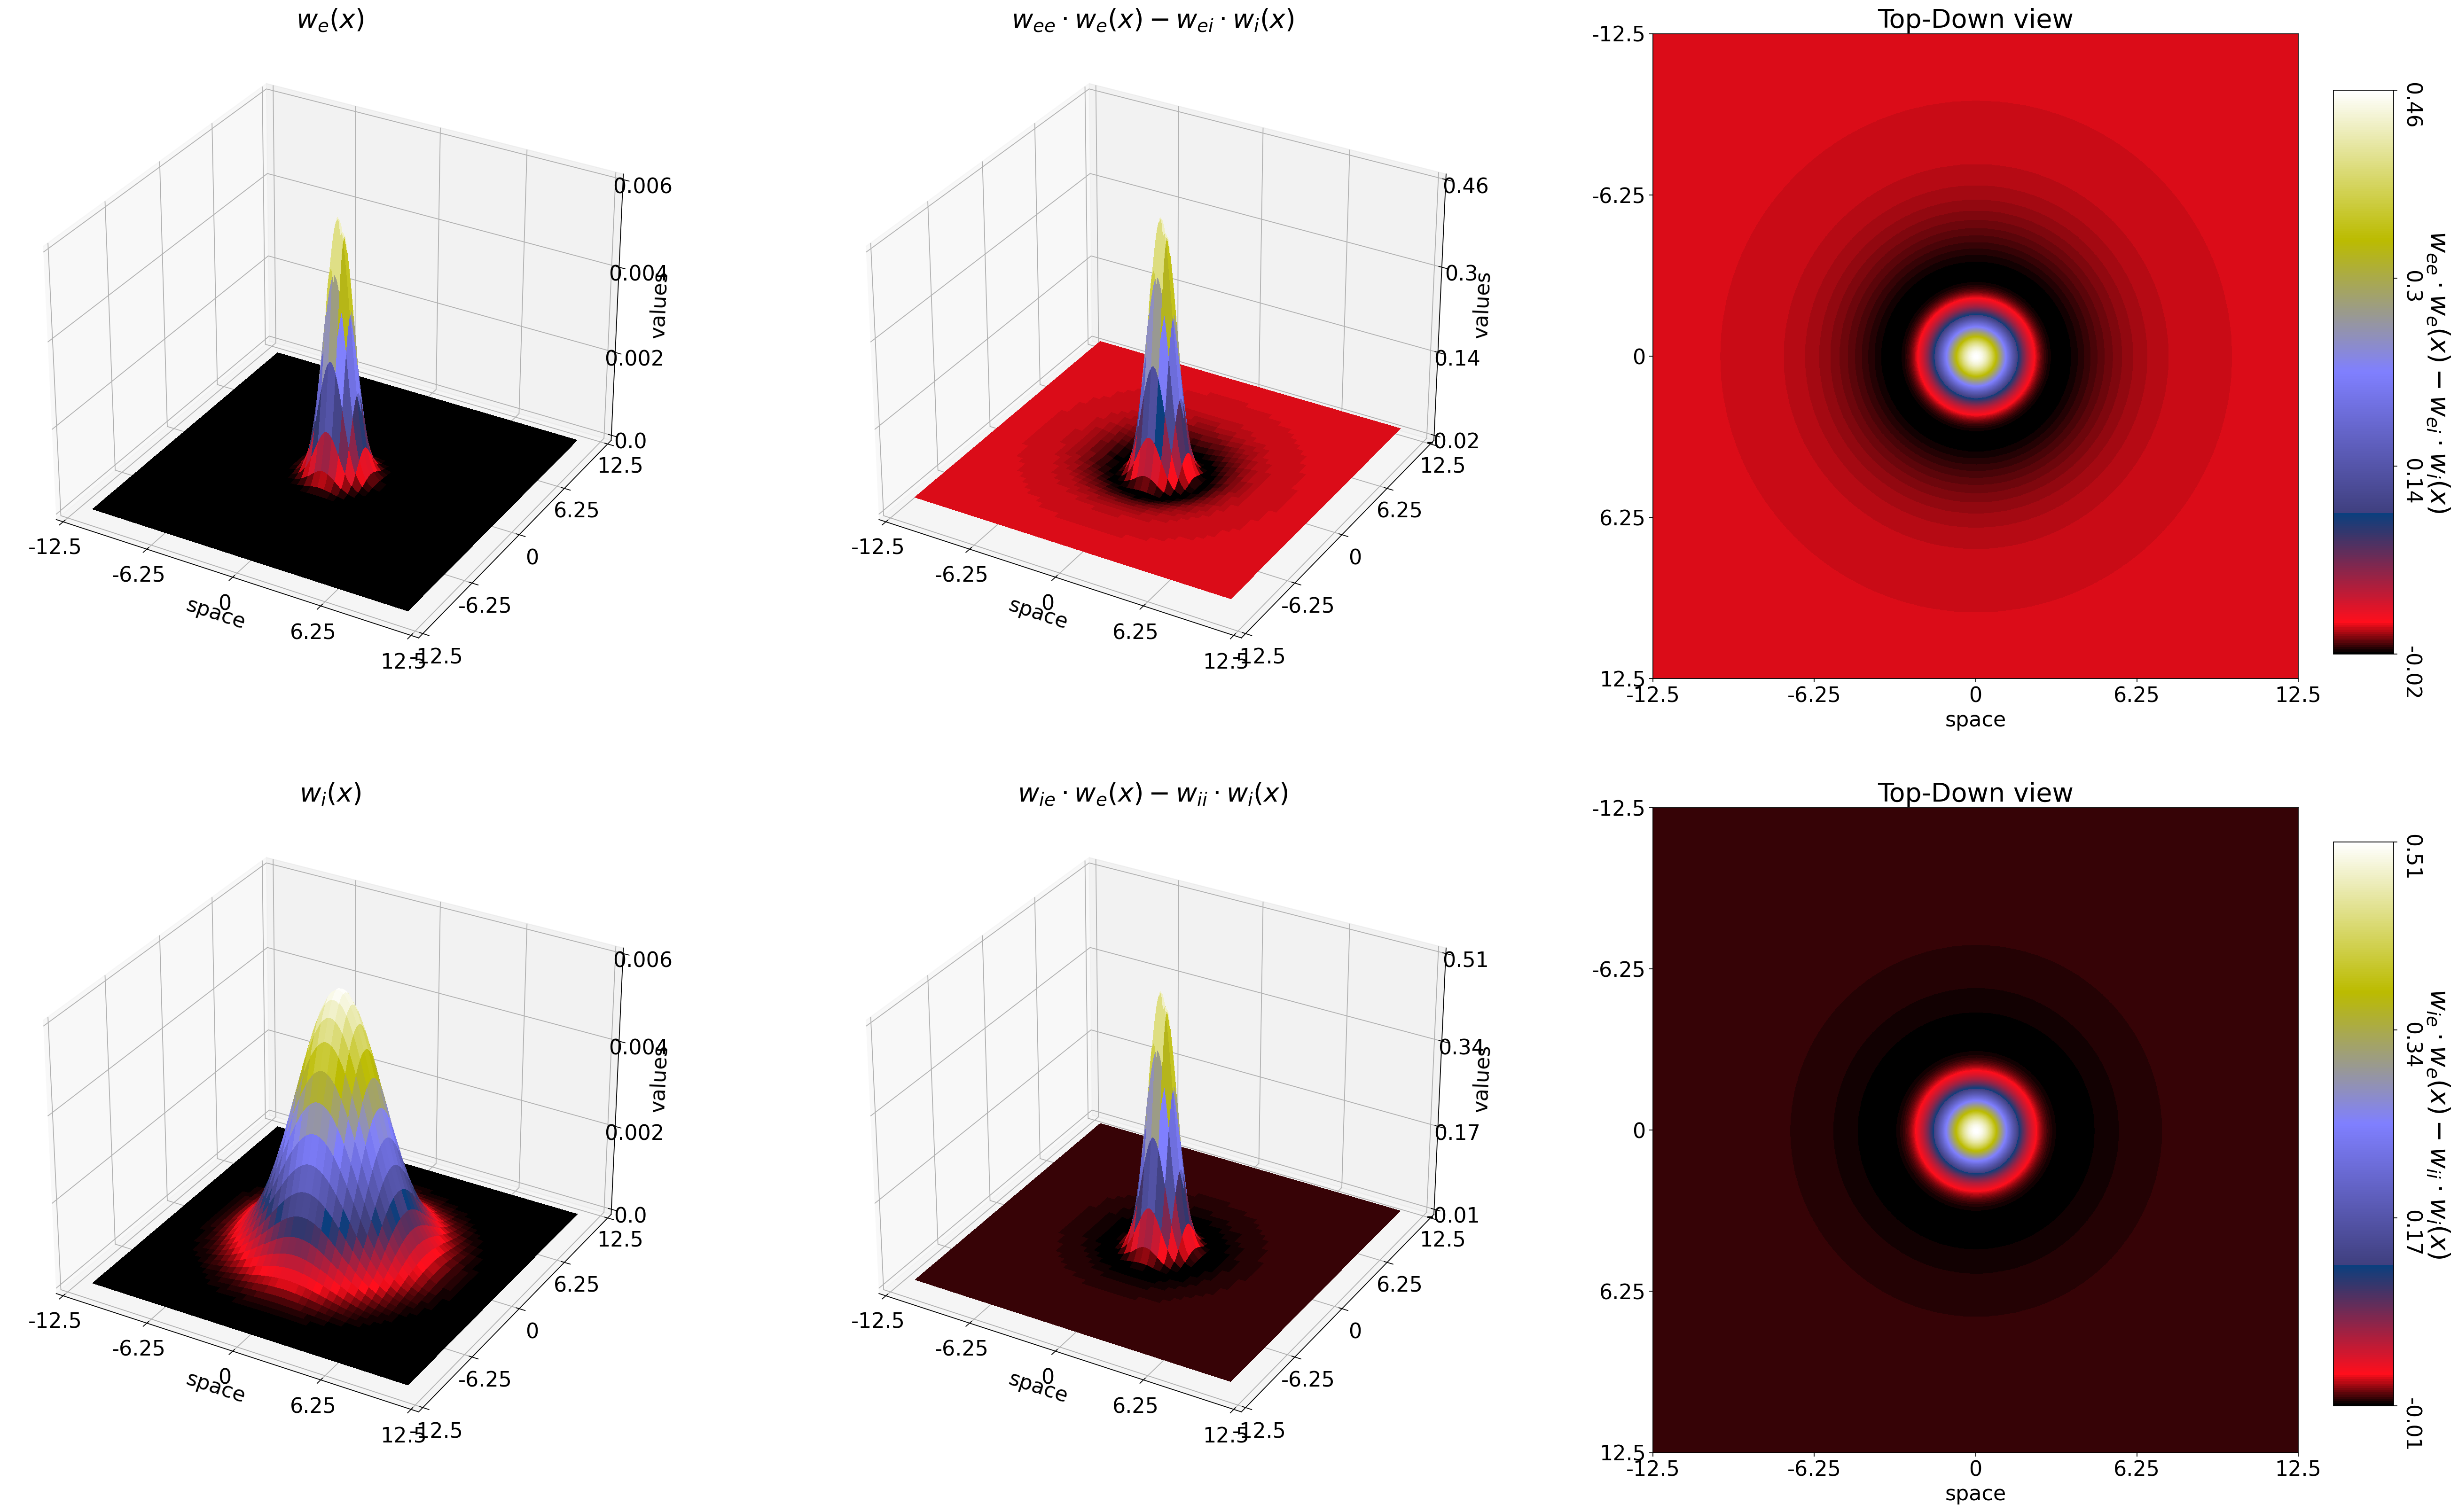

In [15]:
X = params.xcoords
Y = params.ycoords

#fig, ((ax0, ax1, ax2), (ax3, ax4, ax5)) = plt.subplots(2, 3, subplot_kw={"projection": "3d"}, figsize=(30,8), dpi=160)
fig = plt.figure(figsize=(40,25), dpi=160)

ax0 = fig.add_subplot(231, projection='3d')
ax0.plot_surface(X, Y, ke, cmap='gist_stern', vmin=np.min(ke), vmax=np.max(ke), 
                 linewidth=0, antialiased=False)

ax1 = fig.add_subplot(232, projection='3d')
ax1.plot_surface(X, Y, combi_e, cmap='gist_stern', label=r'$w_{ee}\cdot w_e(x)-w_{ei}\cdot w_i(x)$', 
                 vmin=np.min(combi_e), vmax=np.max(combi_e), 
                 linewidth=0, antialiased=False)

ax2 = fig.add_subplot(233)
pos_exc = ax2.imshow(combi_e.T, label=r'$w_{ee}\cdot w_e(x)-w_{ei}\cdot w_i(x)$',  
           vmin=np.min(combi_e), vmax=np.max(combi_e), cmap='gist_stern')#, lw=lw, c='orange')


ax3 = fig.add_subplot(234, projection='3d')
ax3.plot_surface(X, Y, ki, cmap='gist_stern', vmin=np.min(ki), vmax=np.max(ki), 
                 linewidth=0, antialiased=False)

ax4 = fig.add_subplot(235, projection='3d')
ax4.plot_surface(X, Y, combi_i, cmap='gist_stern', label=r'$w_{ie}\cdot w_e(x)-w_{ii}\cdot w_i(x)$', 
                 vmin=np.min(combi_i), vmax=np.max(combi_i), 
                 linewidth=0, antialiased=False)

ax5 = fig.add_subplot(236)
pos_inh = ax5.imshow(combi_i.T, label=r'$w_{ie}\cdot w_e(x)-w_{ii}\cdot w_i(x)$',  
           vmin=np.min(combi_i), vmax=np.max(combi_i), cmap='gist_stern')#, lw=lw, c='blue')

ax0.set_title(r'$w_e(x)$', fontsize=tfs)
ax3.set_title(r'$w_i(x)$', fontsize=tfs)
ax1.set_title(r'$w_{ee}\cdot w_e(x)-w_{ei}\cdot w_i(x)$', fontsize=tfs)
ax4.set_title(r'$w_{ie}\cdot w_e(x)-w_{ii}\cdot w_i(x)$', fontsize=tfs)
ax2.set_title('Top-Down view', fontsize=tfs)
ax5.set_title('Top-Down view', fontsize=tfs)

for ax in [ax0, ax1, ax2, ax3, ax4, ax5]:
    ax.set_xlabel('space', fontsize=fs)
    ax.xaxis.set_major_locator(ticker.LinearLocator(len(space_labels)))
    ax.set_xticklabels(labels=space_labels, fontsize=fs)
    
    ax.yaxis.set_major_locator(ticker.LinearLocator(len(space_labels)))
    ax.set_yticklabels(labels=space_labels, fontsize=fs)

for ax in [ax0, ax1, ax3, ax4]:
    ax.set_zlabel('values', fontsize=fs)
    ax.zaxis.set_major_locator(ticker.LinearLocator(4))

for ax in [ax0, ax3]:
    single_kernel_values = [0.0, 0.002, 0.004, 0.006]
    ax.set_zticklabels(labels=single_kernel_values, fontsize=fs)

mini = np.min(combi_e)
maxi = np.max(combi_e)
combi_kernel_values = np.around(np.linspace(mini, maxi, 4), decimals=2)
ax1.set_zticklabels(labels=combi_kernel_values, fontsize=fs)

mini = np.min(combi_i)
maxi = np.max(combi_i)
combi_kernel_values = np.around(np.linspace(mini, maxi, 4), decimals=2)
ax4.set_zticklabels(labels=combi_kernel_values, fontsize=fs)
    
#Colorbar for excitatory
cbar_ticks=np.linspace(np.min(combi_e), np.max(combi_e), 4)
cbar_labels=np.around(cbar_ticks, decimals=2)
# Create colorbar
cb_ax = fig.add_axes([.905,.55,.02,.3]) #[left-right; down; width; up]
cbar = ax2.figure.colorbar(pos_exc, ax=ax1, ticks=cbar_ticks, cax=cb_ax)
cbar.ax.set_ylabel(r'$w_{ee}\cdot w_e(x)-w_{ei}\cdot w_i(x)$', rotation=-90, va="bottom", fontsize=tfs)
cbar.ax.set_yticklabels(cbar_labels, rotation=-90, fontsize=fs)


#Colorbar for inhibitory
cbar_ticks=np.linspace(np.min(combi_i), np.max(combi_i), 4)
cbar_labels=np.around(cbar_ticks, decimals=2)
# Create colorbar
cb_ax = fig.add_axes([.905,.15,.02,.3]) #[left-right; down; width; up]
cbar = ax5.figure.colorbar(pos_inh, ax=ax1, ticks=cbar_ticks, cax=cb_ax)
cbar.ax.set_ylabel(r'$w_{ie}\cdot w_e(x)-w_{ii}\cdot w_i(x)$', rotation=-90, va="bottom", fontsize=tfs)
cbar.ax.set_yticklabels(cbar_labels, rotation=-90, fontsize=fs)

plt.tight_layout()
#ax.legend(loc='upper right', fontsize=fs)

### Value to consider strength and spatial spread per connection

To identify the entire positive and negative feedback to a population, we need to observe two things:

    1. strength of the feedback
    2. its' spatial extent.

To do so, we first identify the radius $r_j,\ j\in\{e,i\}$ of the spatial kernel for which the feedback is excitatory, to then identify the entire positive ($g_+$) vs. negative ($g_-$) feedback with

$
\int \int_{||\underline{r}||\leq r_j} w_j(\underline{r}) dxdy,
$
whereas $\underline{r}=(x,y)$ the coordinates 

In [90]:
re, ri = circleLimit_Gaussian(params)
gE_plus, gE_minus, gI_plus, gI_minus = withinCircle(params, re, ri)

### Coverage of kernel w.r.t. simulated space

Further, we set the 'amount of space' (e.g. in [$\mu m^2$]) into relation of the 'amount of space' covered by positive kernel-feedback vs. negative kernel feedback (where we considered negative kernel feedback values up to the order of 0.1e-15).

In [129]:
entire_space = np.sum(abs(params.distx))*params.dx*params.dy
pos_coverage_exc, neg_coverage_exc, coverage_matrix_exc = covered_space(params.distx, params.dx, params.dy, re, combi_e, 0.3e-3)
pos_coverage_inh, neg_coverage_inh, coverage_matrix_inh = covered_space(params.distx, params.dx, params.dy, ri, combi_i, 0.3e-3)

In [130]:
#determine "how much of the entire space is covered" by taking the ratios:
#for the excitatory population
ratio_pos_coverage_exc = pos_coverage_exc/entire_space
ratio_neg_coverage_exc = neg_coverage_exc/entire_space

#for the inhibitory population
ratio_pos_coverage_inh = pos_coverage_inh/entire_space
ratio_neg_coverage_inh = neg_coverage_inh/entire_space

/var/folders/8l/w8cdnkkj38bg2pscx__1vxth0000gn/T/ipykernel_15198/605835839.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=space_labels, fontsize=fs)
/var/folders/8l/w8cdnkkj38bg2pscx__1vxth0000gn/T/ipykernel_15198/605835839.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels=space_labels, fontsize=fs)
/var/folders/8l/w8cdnkkj38bg2pscx__1vxth0000gn/T/ipykernel_15198/605835839.py:54: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=space_labels, fontsize=fs)


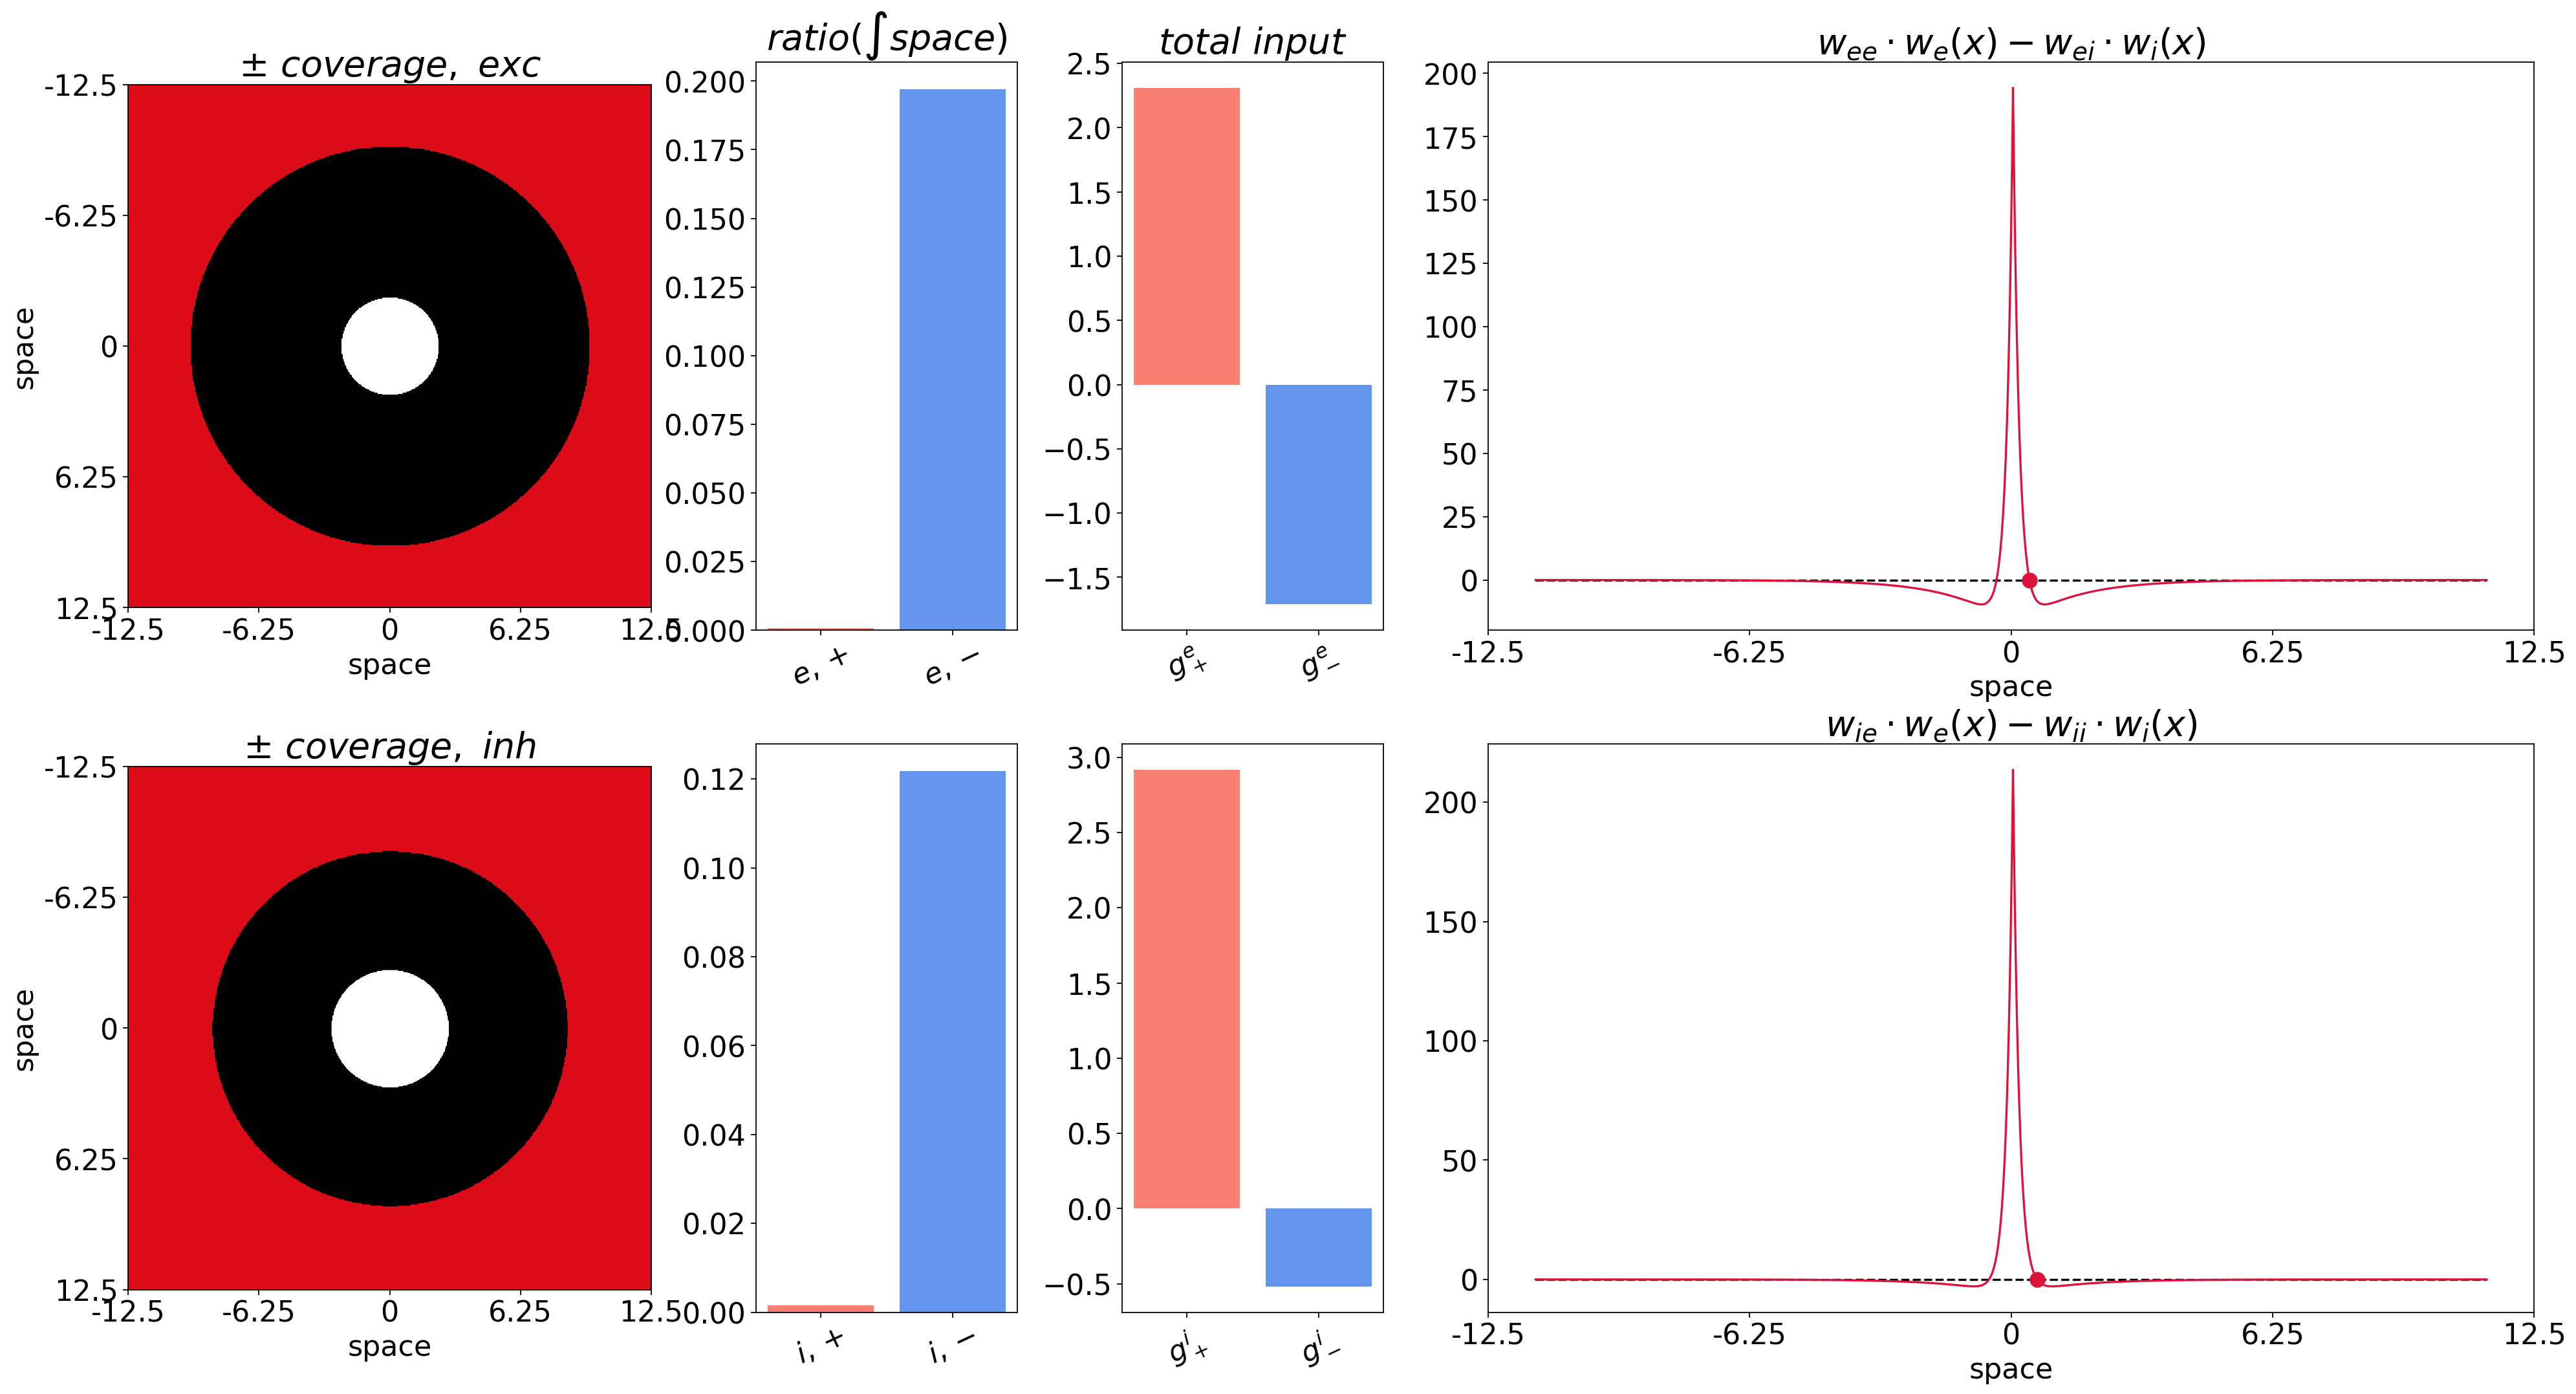

In [131]:
width_ratios = [1, 0.5, 0.5, 2]

fig, ((ax0, ax11, ax12, ax2), (ax3, ax41, ax42, ax5)) = plt.subplots(2, 4, figsize=(30,16), dpi=160, gridspec_kw={'width_ratios': width_ratios})

ax0.imshow(coverage_matrix_exc.T, label=r'$w_{ee}\cdot w_e(x)-w_{ei}\cdot w_i(x)$',  
           vmin=np.min(combi_e), vmax=np.max(combi_e), cmap='gist_stern')
ax0.set_title(label=r'$\pm\ coverage,\ exc$', fontsize=tfs)
ax3.imshow(coverage_matrix_inh.T, label=r'$w_{ie}\cdot w_e(x)-w_{ii}\cdot w_i(x)$',  
           vmin=np.min(combi_e), vmax=np.max(combi_e), cmap='gist_stern')
ax3.set_title(label=r'$\pm\ coverage,\ inh$', fontsize=tfs)



for ax in [ax0, ax3]:
        ax.set_xlabel('space', fontsize=fs)
        ax.xaxis.set_major_locator(ticker.LinearLocator(len(space_labels)))
        ax.set_xticklabels(labels=space_labels, fontsize=fs)
        ax.set_ylabel('space', fontsize=fs)
        ax.yaxis.set_major_locator(ticker.LinearLocator(len(space_labels)))
        ax.set_yticklabels(labels=space_labels, fontsize=fs)

ax11.bar([r'$e,+$', r'$e,-$'], 
        [ratio_pos_coverage_exc, ratio_neg_coverage_exc], color=['salmon', 'cornflowerblue'])
ax11.set_title(label=r'$ratio(\int space)$', fontsize=tfs)
ax12.bar([r'$g_+^e$', r'$g_-^e$'], 
        [gE_plus, gE_minus], color=['salmon', 'cornflowerblue'])
ax12.set_title(label=r'$total \ input$', fontsize=tfs)

ax41.bar([r'$i,+$', r'$i,-$'], 
        [ratio_pos_coverage_inh, ratio_neg_coverage_inh], color=['salmon', 'cornflowerblue'])
ax42.bar([r'$g_+^i$', r'$g_-^i$'], 
        [gI_plus, gI_minus], color=['salmon', 'cornflowerblue'])

for ax in [ax11, ax12, ax41, ax42]:
        ax.tick_params(axis='x', labelsize=fs, rotation=25)
        ax.tick_params(axis='y', labelsize=fs)

rol = int(params.n/2)
a = params.distx[rol]
a[:rol] *= (-1)
ax2.plot(a, combi_e[rol]*(1/params.dx)*(1/params.dy), c='crimson', zorder=1)
ax2.plot(a, np.zeros(len(a)), ls='dashed', c='black', zorder=0)
ax2.scatter(params.distx[rol, rol]+re, 0, s=100, c='crimson', zorder=2)
ax2.set_title(label=r'$w_{ee}\cdot w_e(x)-w_{ei}\cdot w_i(x)$', fontsize=tfs)

ax5.plot(a, combi_i[rol]*(1/params.dx)*(1/params.dy), c='crimson', zorder=1)
ax5.plot(a, np.zeros(len(a)), ls='dashed', c='black', zorder=0)
ax5.scatter(params.distx[rol, rol]+ri, 0, s=100, c='crimson', zorder=2)
ax5.set_title(label=r'$w_{ie}\cdot w_e(x)-w_{ii}\cdot w_i(x)$', fontsize=tfs)

for ax in [ax2, ax5]:
        ax.set_xlabel('space', fontsize=fs)
        ax.xaxis.set_major_locator(ticker.LinearLocator(len(space_labels)))
        ax.set_xticklabels(labels=space_labels, fontsize=fs)
        ax.tick_params(axis='y', labelsize=fs)

In [132]:
#reset number of nodes for computation time (512 is too large for "fast" simulations)
params['n'] = 128
params['m'] = 128
params=setParams(params)

# State Spaces

As in the spatially 1-dimensional model, we determined the local limit stability per $(I_e,I_i)$-parameterization, the corresponding stability in the full model (i.e. static/dynamic Turing instability of homogeneous steady states), as well as simulated the activity per parameterization to identify whether the underlying activity is either

    - stationary (temporally and spatially stationary, green)
    - temporal (temporally oscillatory, spatially stationary, beige)
    - spatial (temporally stationary, spatially oscillatory, pink)
    - spatiotemporal (temporally and spatially oscillatory, gray)

Further, the contour-lines frame regimes of different types of stability.

In [5]:
df_default = pd.read_csv('csv/2d-default-long.csv')
df_adaps = pd.read_csv('csv/2d-adaps-long.csv')

In [6]:
xaxis='I_e'
yaxis='I_i'

stabis_default = df_default.pivot_table('stability', columns=xaxis, index=yaxis)
turings_default = df_default.pivot_table('turing', columns=xaxis, index=yaxis)
p_randoms_default = df_default.pivot_table('p_random', columns=xaxis, index=yaxis)
p_downs_default = df_default.pivot_table('p_down', columns=xaxis, index=yaxis) 

stabis_adaps = df_adaps.pivot_table('stability', columns=xaxis, index=yaxis)
turings_adaps = df_adaps.pivot_table('static', columns=xaxis, index=yaxis)
p_randoms_adaps = df_adaps.pivot_table('p_random', columns=xaxis, index=yaxis)
p_downs_adaps = df_adaps.pivot_table('p_down', columns=xaxis, index=yaxis) 

titles = ['without adaps, rnd. init.', 'with adaps, rnd. init.',
       'without adaps, seed-init around down', 'with adaps, seed-init around down']

In [7]:
def setAxes(df, nmb):
    
    # Add minorticks on the colorbar to make it easy to read the
    # values off the colorbar.
    
    nmb_labels = 5
                
    idx_x = np.linspace(0,len(df.columns.values)-1, nmb_labels).astype(int)
    idx_y = np.linspace(0,len(df.index.values)-1, nmb_labels).astype(int)
        
    xliste= np.round(df.columns.values, decimals=2)[idx_x]
    yliste= np.round(df.index.values, decimals=2)[idx_y]
    
    #xliste = np.linspace(xaxis[0],xaxis[-1],nmb_labels)
    #yliste = np.linspace(yaxis[-1],yaxis[0],nmb_labels)
    
    xlabels=list('%.1f'%(e) for e in xliste)
    ylabels=list('%.1f'%(e) for e in yliste)
    
    return xlabels, ylabels

/var/folders/8l/w8cdnkkj38bg2pscx__1vxth0000gn/T/ipykernel_8675/990010319.py:14: UserWarning: No contour levels were found within the data range.
  ax0.contour(turings_default, origin='lower', vmin=0, vmax=1, levels=0, colors=[unstable_color],
/var/folders/8l/w8cdnkkj38bg2pscx__1vxth0000gn/T/ipykernel_8675/990010319.py:19: UserWarning: No contour levels were found within the data range.
  ax1.contour(turings_adaps, origin='lower', vmin=0, vmax=1, levels=0, colors=[unstable_color],
/var/folders/8l/w8cdnkkj38bg2pscx__1vxth0000gn/T/ipykernel_8675/990010319.py:24: UserWarning: No contour levels were found within the data range.
  ax2.contour(turings_default, origin='lower', vmin=0, vmax=1, levels=0, colors=[unstable_color],
/var/folders/8l/w8cdnkkj38bg2pscx__1vxth0000gn/T/ipykernel_8675/990010319.py:29: UserWarning: No contour levels were found within the data range.
  ax3.contour(turings_adaps, origin='lower', vmin=0, vmax=1, levels=0, colors=[unstable_color],
/var/folders/8l/w8cdnkkj38bg

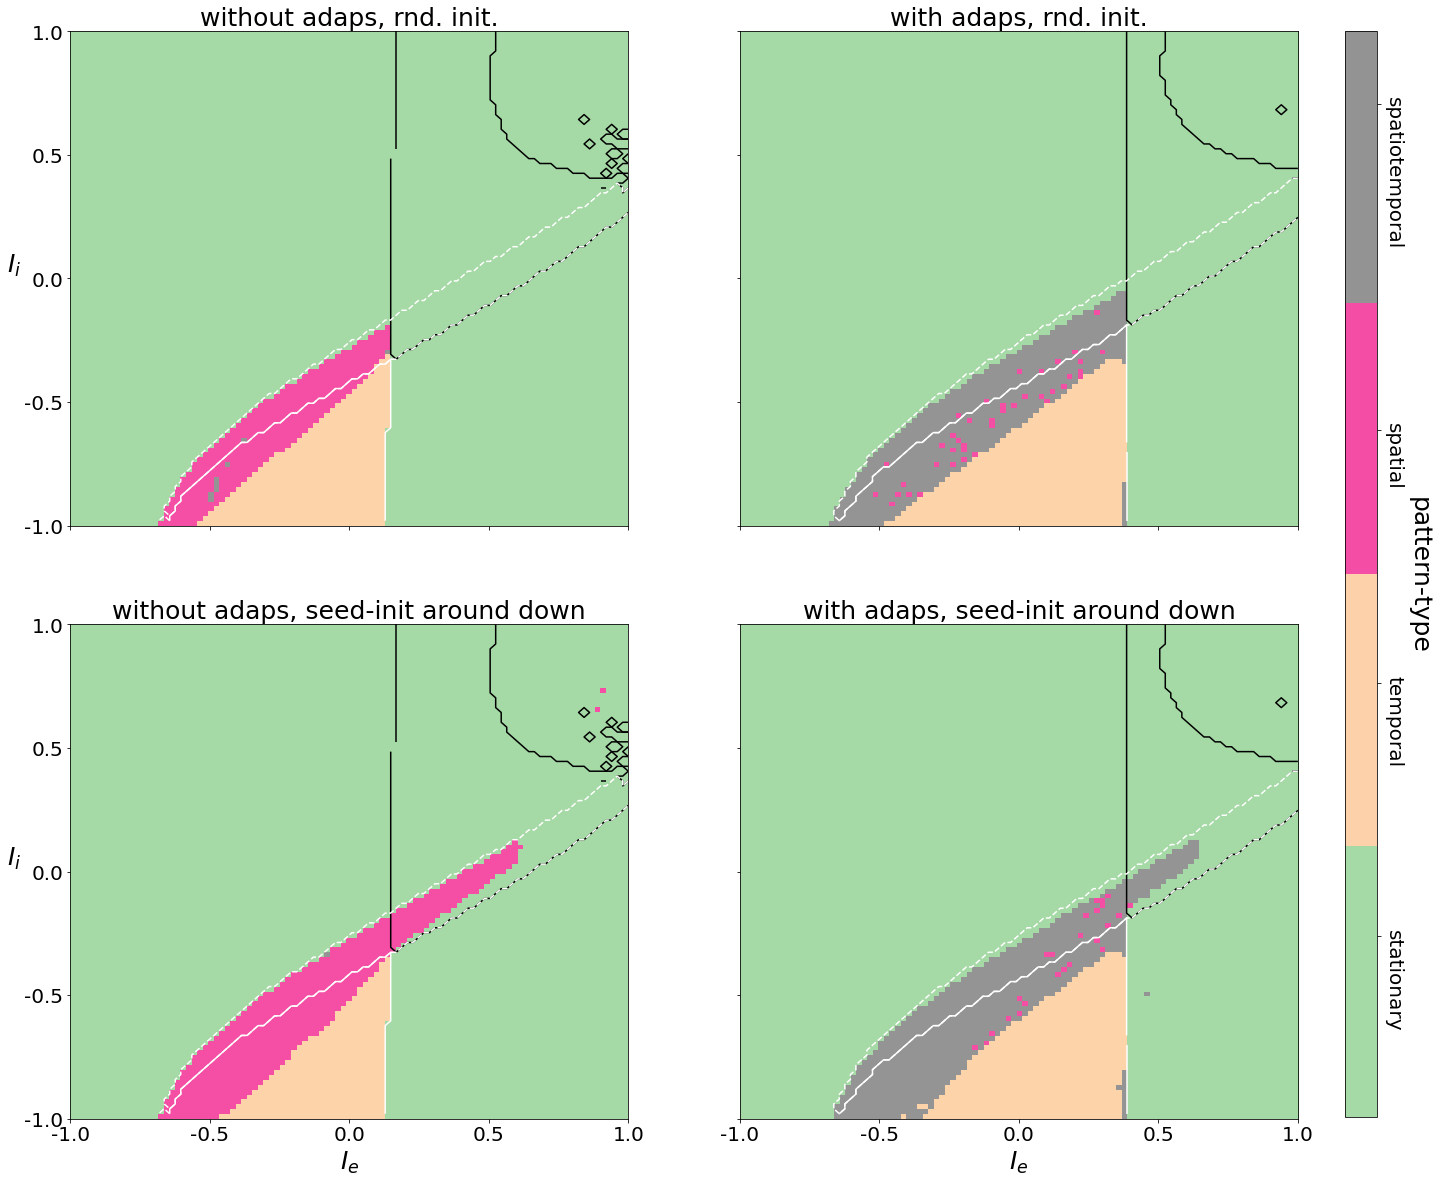

In [8]:
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2,2, figsize=(22,20))

p_colors = cm.get_cmap('Accent', 4)

unstable_color = 'white'
stable_color='black'

nmb_labels = 5
                
xlabels, ylabels = setAxes(stabis_default, nmb_labels)
    
ax0.imshow(p_randoms_default, origin='lower', vmin=1, vmax=4, aspect='auto', cmap=p_colors, alpha=0.7) #
ax0.contour(stabis_default, origin='lower', vmin=0, vmax=2, levels=1, colors=[unstable_color, stable_color, 'green'])
ax0.contour(turings_default, origin='lower', vmin=0, vmax=1, levels=0, colors=[unstable_color], 
               linestyles='dashed')

ax1.imshow(p_randoms_adaps, origin='lower', vmin=1, vmax=4, aspect='auto', cmap=p_colors, alpha=0.7) #
ax1.contour(stabis_adaps, origin='lower', vmin=0, vmax=2, levels=1, colors=[unstable_color, stable_color, 'green'])
ax1.contour(turings_adaps, origin='lower', vmin=0, vmax=1, levels=0, colors=[unstable_color], 
               linestyles='dashed')

ax2.imshow(p_downs_default, origin='lower', vmin=1, vmax=4, aspect='auto', cmap=p_colors, alpha=0.7) #
ax2.contour(stabis_default, origin='lower', vmin=0, vmax=2, levels=1, colors=[unstable_color, stable_color, 'green'])
ax2.contour(turings_default, origin='lower', vmin=0, vmax=1, levels=0, colors=[unstable_color], 
               linestyles='dashed')

pos = ax3.imshow(p_downs_adaps, origin='lower', vmin=1, vmax=4, aspect='auto', cmap=p_colors, alpha=0.7) #
ax3.contour(stabis_adaps, origin='lower', vmin=0, vmax=2, levels=1, colors=[unstable_color, stable_color, 'green'])
ax3.contour(turings_adaps, origin='lower', vmin=0, vmax=1, levels=0, colors=[unstable_color], 
               linestyles='dashed')

for idx, ax in enumerate([ax0, ax1, ax2, ax3]):
    ax.set_title(label=titles[idx], fontsize=tfs)
    ax.xaxis.set_major_locator(ticker.LinearLocator(nmb_labels))
    ax.set_xticklabels(labels=xlabels, fontsize=fs)
    ax.yaxis.set_major_locator(ticker.LinearLocator(nmb_labels))
    ax.set_yticklabels(labels=ylabels, fontsize=fs)
    
    ax.set_xlabel(r'$%s$' %xaxis, fontsize=tfs)
    ax.set_ylabel(r'$%s$' %yaxis, labelpad=10, rotation=0, fontsize=tfs)
    
    ax.label_outer()

mini = 1
maxi = 4
cbar_ticks=[1.5, 2.2, 2.9, 3.8]#np.linspace(mini,maxi,4)
cbar_labels=['stationary', 'temporal', 'spatial', 'spatiotemporal']
cb_ax = fig.add_axes([.93,.126,.02,.754]) #[left-right; down; width; up]
cbar = ax.figure.colorbar(pos, ax=ax, ticks=cbar_ticks, cax=cb_ax)
cbar.ax.set_ylabel('pattern-type', rotation=-90, va="bottom", fontsize=tfs)
cbar.ax.set_yticklabels(cbar_labels, rotation=-90, fontsize=fs)
cbar.minorticks_off()
    
    